#Drugs Classification With Machine Learning Models



Download Dataset

In [ ]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-01-05 06:53:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-05 06:53:37 (1.82 GB/s) - ‘drug200.csv’ saved [6027/6027]



#STEP-1 : Data Preparation


#1.1 Data Collection

In [ ]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the data

df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# Feature Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
# Count of drugs

df.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
# decsriptive stats

df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,1.000000,0.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


In [ ]:
# Null check

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#1.2 Exploratory Data Analysis(EDA)

<Axes: xlabel='Age', ylabel='Density'>

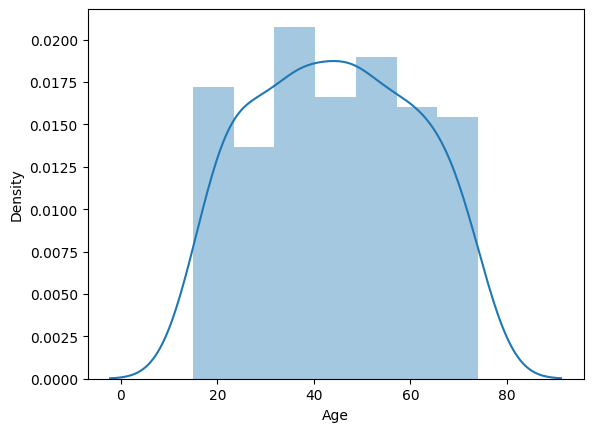

In [ ]:
# 1) Age of the patients

sns.distplot(df['Age'])

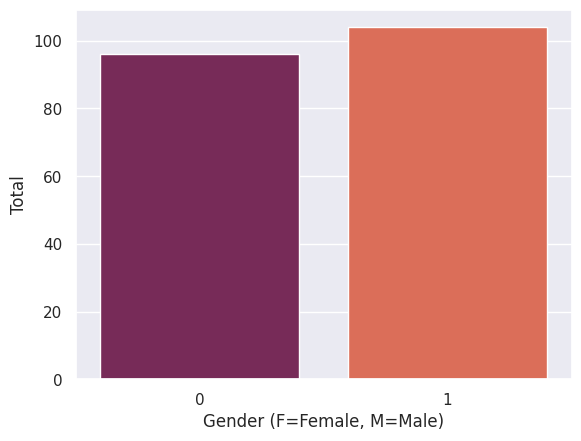

In [ ]:
# 2) Gender Distribution

sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df , palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

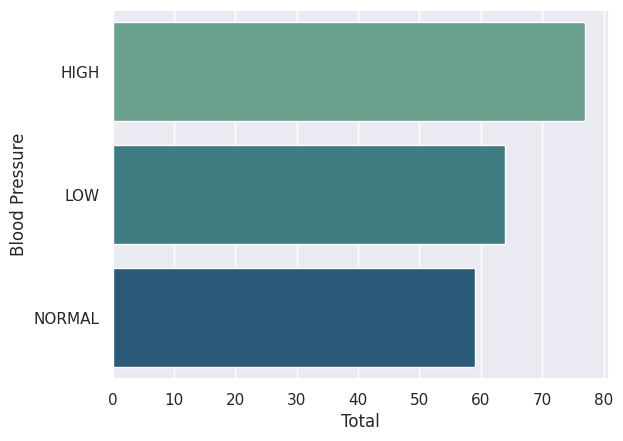

In [ ]:
# 3) Blood pressure of patients


sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

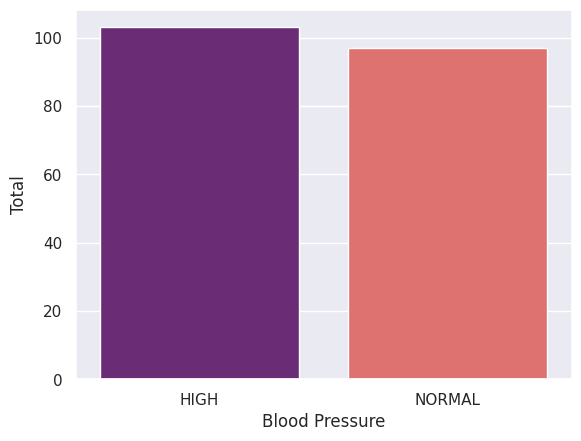

In [ ]:
# 4) Cholesterol of the patients

sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

Maximum Sodium-Potassium ratio: 38.247
Minimum Sodium-Potassium ratio: 6.269


<Axes: xlabel='Na_to_K', ylabel='Density'>

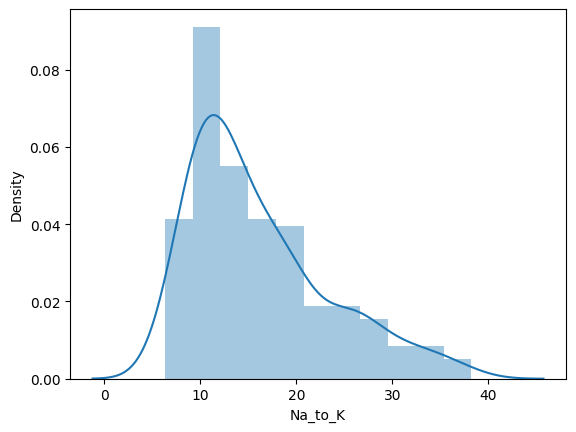

In [ ]:
# 5) Sodium-Potassium ratio in patient's blood

print("Maximum Sodium-Potassium ratio:",df.Na_to_K.max())
print("Minimum Sodium-Potassium ratio:",df.Na_to_K.min())
sns.distplot(df.Na_to_K)

In [ ]:
# 6) Drug administered to the patient

df.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

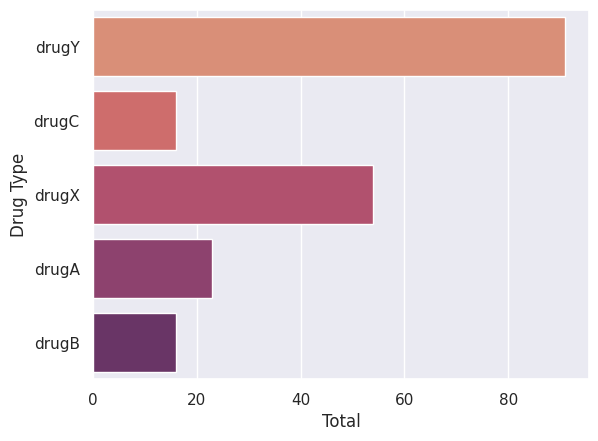

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

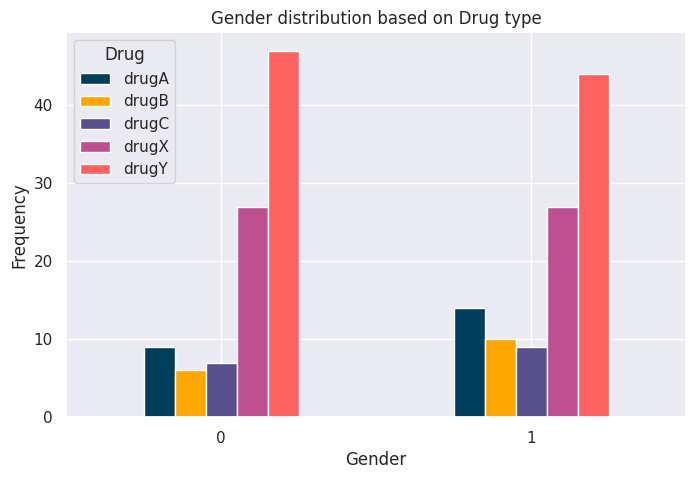

In [ ]:
# 7) Gender Distribution based on Drug Type

pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(8,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

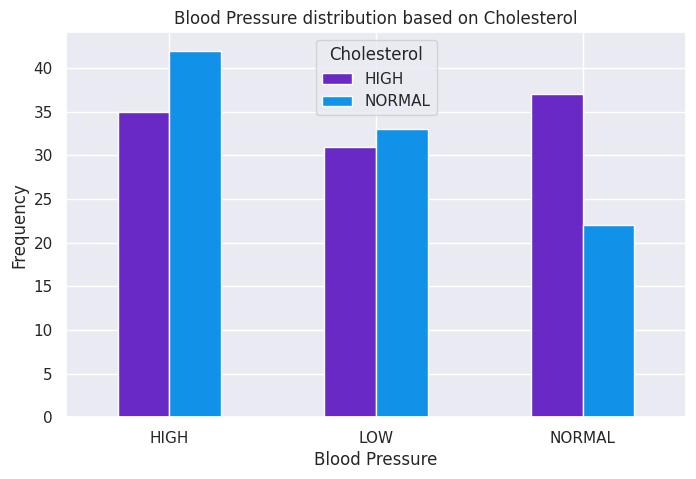

In [ ]:
# 8) Blood Pressure Distribution based on Cholesetrol

pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(8,5),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

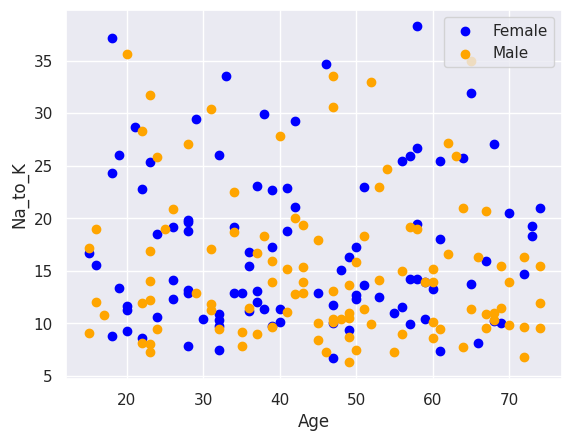

In [ ]:
# 8) Sodium to Potassium Distribution based on Gender and Age

plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

#STEP - 2 : Dataset Preparation

 # 2.1 : Data Binning


In [ ]:
# Age

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

In [ ]:
# Na_to_K

bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

# 2.2 Splitting the Dataset

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = df.drop(["Drug"], axis=1)
y = df["Drug"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (140, 6)
x_test shape: (60, 6)
y_train shape: (140,)
y_test shape: (60,)


In [ ]:

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

# STEP 3 : Model Building


# 1. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)
y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.25      0.60      0.35         5
           1       0.43      1.00      0.60         3
           2       0.38      0.75      0.50         4
           3       0.92      0.67      0.77        18
           4       1.00      0.67      0.80        30

    accuracy                           0.68        60
   macro avg       0.60      0.74      0.61        60
weighted avg       0.84      0.68      0.73        60

[[ 3  2  0  0  0]
 [ 0  3  0  0  0]
 [ 1  0  3  0  0]
 [ 3  1  2 12  0]
 [ 5  1  3  1 20]]
K Neighbours accuracy is: 68.33%


# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         4
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        30

    accuracy                           0.95        60
   macro avg       0.93      0.86      0.87        60
weighted avg       0.96      0.95      0.95        60

[[ 4  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Logistic Regression accuracy is: 95.00%


# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        30

    accuracy                           0.97        60
   macro avg       0.92      0.92      0.90        60
weighted avg       0.98      0.97      0.97        60

[[ 3  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Decision Tree accuracy is: 96.67%


# 4. Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        30

    accuracy                           0.97        60
   macro avg       0.92      0.92      0.90        60
weighted avg       0.98      0.97      0.97        60

[[ 3  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
SVC accuracy is: 96.67%


# 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.60      1.00      0.75         3
           2       1.00      0.50      0.67         4
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        30

    accuracy                           0.93        60
   macro avg       0.90      0.82      0.82        60
weighted avg       0.95      0.93      0.93        60

[[ 3  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Random Forest accuracy is: 93.33%


# 6. Naive Bayes


# 6.1 Categorical NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         4
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        30

    accuracy                           0.97        60
   macro avg       0.98      0.90      0.92        60
weighted avg       0.97      0.97      0.96        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Naive Bayes accuracy is: 96.67%


# 6.2 Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         4
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        30

    accuracy                           0.97        60
   macro avg       0.98      0.90      0.92        60
weighted avg       0.97      0.97      0.96        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Gaussian Naive Bayes accuracy is: 96.67%


# STEP - 4 : Model Comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors','SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree','Random Forest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,96.666667
3,Categorical NB,96.666667
4,Gaussian NB,96.666667
5,Decision Tree,96.666667
0,Logistic Regression,95.000000
6,Random Forest,93.333333
1,K Neighbors,68.333333


#STEP - 4 : Model Building

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

rf_classifier.fit(X_train_encoded, y_train)
svm_classifier.fit(X_train_encoded, y_train)
nb_classifier.fit(X_train_encoded, y_train)
knn_classifier.fit(X_train_encoded, y_train)
dt_classifier.fit(X_train_encoded, y_train)
lr_classifier.fit(X_train_encoded, y_train)

rf_predictions = rf_classifier.predict(X_test_encoded)
svm_predictions = svm_classifier.predict(X_test_encoded)
nb_predictions = nb_classifier.predict(X_test_encoded)
knn_predictions = knn_classifier.predict(X_test_encoded)
dt_predictions = dt_classifier.predict(X_test_encoded)
lr_predictions = lr_classifier.predict(X_test_encoded)

rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


Random Forest Accuracy: 0.95
SVM Accuracy: 1.0
Naive Bayes Accuracy: 0.95
KNN Accuracy: 0.85
Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 0.95


# STEP - 6 : Choosing The Best Model

In [101]:
best_model = compare.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Best Model:", best_model['Model'])
print("Accuracy:", best_model['Accuracy'])

Best Model: SVM
Accuracy: 96.66666666666667
